# **Insurance Premium Prediction**
# The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

# **Dataset Source - https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction**

# **Import Data and Required Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Import the CSV Data as Pandas DataFrame**

In [ ]:
df = pd.read_csv("insurance.csv")

# **Show Top 5 Records**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# **Shape of the dataset**

In [ ]:
df.shape

(1338, 7)

# **Check Missing values**

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# **Check Duplicates**

In [ ]:
df.duplicated().sum()

1

# **Remove Duplicates**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

# **Check data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# **Checking the number of unique values of each column**

In [ ]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

# **Check statistics of data set**

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


# **Exploring Data**

In [ ]:
print("Categories in 'gender' variable:")
print(df['sex'].unique())

print("Categories in 'smoker' variable:")
print(df['smoker'].unique())

print("Categories in 'region' variable:")
print(df['region'].unique())

Categories in 'gender' variable:
['female' 'male']
Categories in 'smoker' variable:
['yes' 'no']
Categories in 'region' variable:
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('numeric_features:', numeric_features)
print('\ncategorical features:',categorical_features)

numeric_features: ['age', 'bmi', 'children', 'expenses']

categorical features: ['sex', 'smoker', 'region']


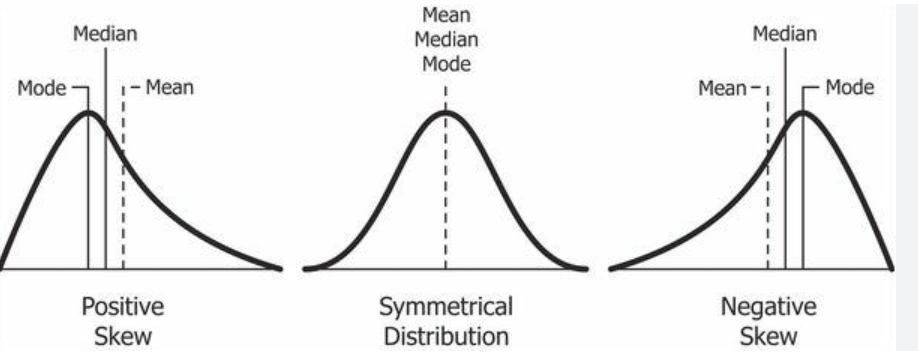

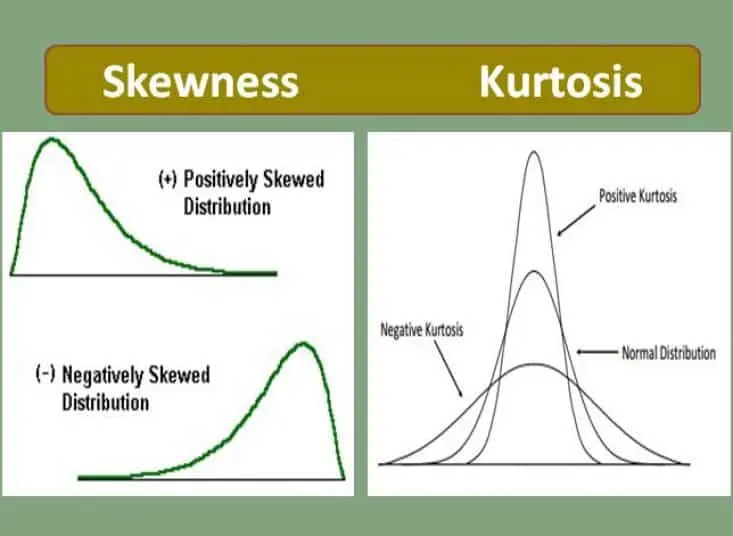

In [ ]:
from scipy.stats import kurtosis, skew, stats

# Some says for skewness (−1,1) and (−2,2) for kurtosis is an acceptable range

In [ ]:
print("Summary Statistics of Medical Costs")
print(df['expenses'].describe())
print("skew:  {}".format(skew(df['expenses'])))
print("kurtosis:  {}".format(kurtosis(df['expenses'])))
print("missing charges values: {}".format(df['expenses'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1337.000000
mean     13279.121638
std      12110.359657
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      63770.430000
Name: expenses, dtype: float64
skew:  1.5136902470367863
kurtosis:  1.5937433353396573
missing charges values: 0
missing smoker values: 0


# **data is Skewed**


<Axes: >

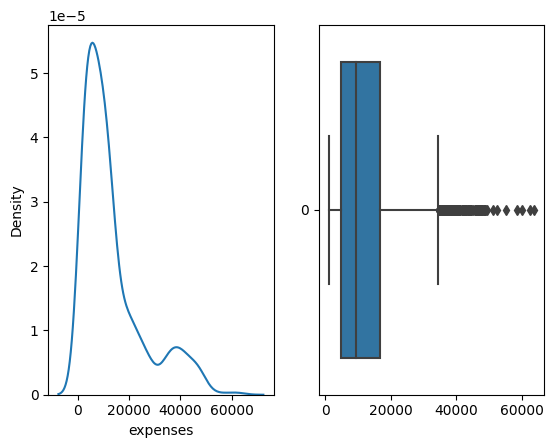

In [ ]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['expenses'], ax=axes[0])
sns.boxplot(df['expenses'], ax=axes[1], orient='h')

# Both the boxplot and kernel density estimation plot reveal that the expences data is right skewed. Furthermore, there are some outliers but no missing values

## **find the correlation among the columns in the Dataframe using ‘Pearson’ method. 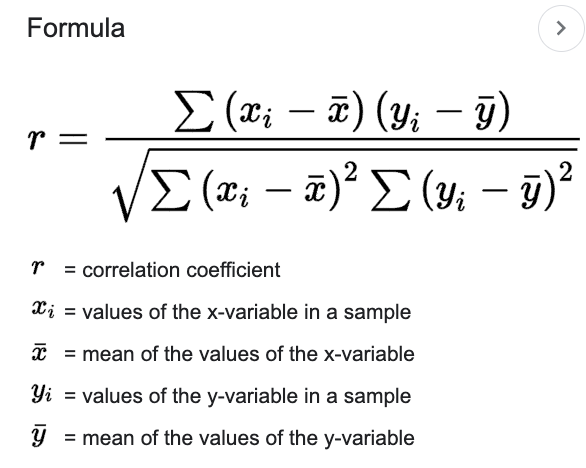**


In [ ]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


# **Tell us how much two random variables vary together**

In [ ]:
df.cov()

,age,bmi,children,expenses
age,197.243282,9.374581,0.703268,5.073683e+04
bmi,9.374581,37.218099,0.092974,1.467556e+04
children,0.703268,0.092974,1.453402,9.838781e+02
expenses,50736.833483,14675.556214,983.878069,1.466608e+08


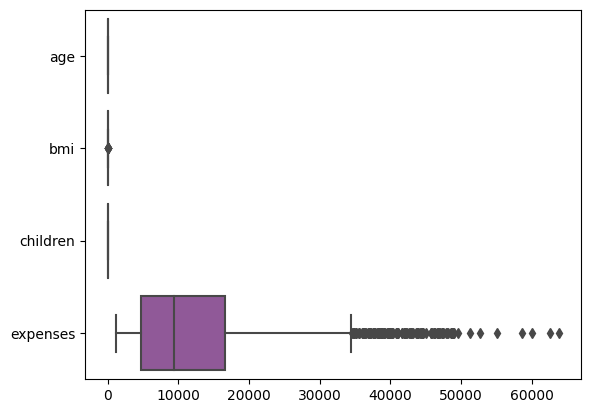

In [ ]:
ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")
plt.show()

# **Count of Column values**

In [ ]:
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

# **Rename Column**

In [ ]:
df.rename(columns={'sex':'gender'}, inplace=True, level=None)

In [ ]:
df.gender.value_counts()

male      675
female    662
Name: gender, dtype: int64

# **UNIVARIATE ANALYSIS**
# (How is distribution of Gender?)

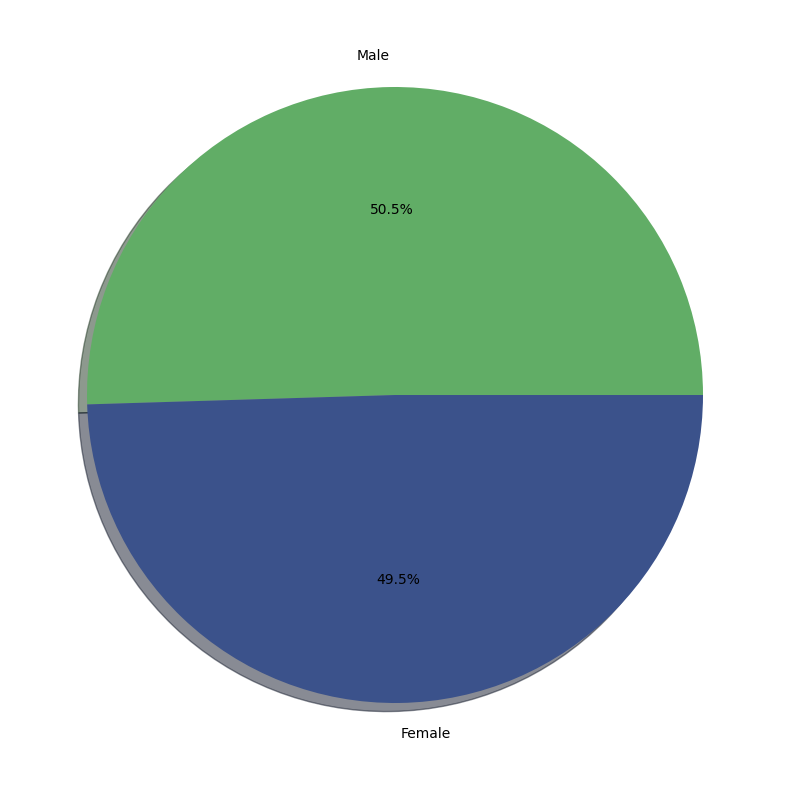

In [ ]:
f,ax=plt.subplots(figsize=(20,10))
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',shadow=True,colors = ['#61ad66','#3b528b'])
plt.show()

# **Insights**
# Gender has balanced data with females are 662 (49.5%) and males are 675 (50.5%)

<Axes: xlabel='age', ylabel='Count'>

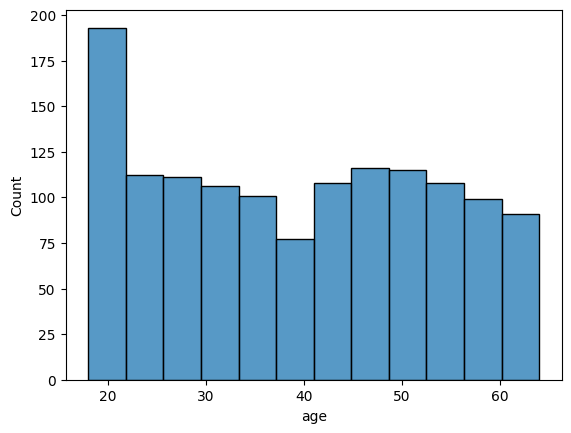

In [ ]:
sns.histplot(df.age)

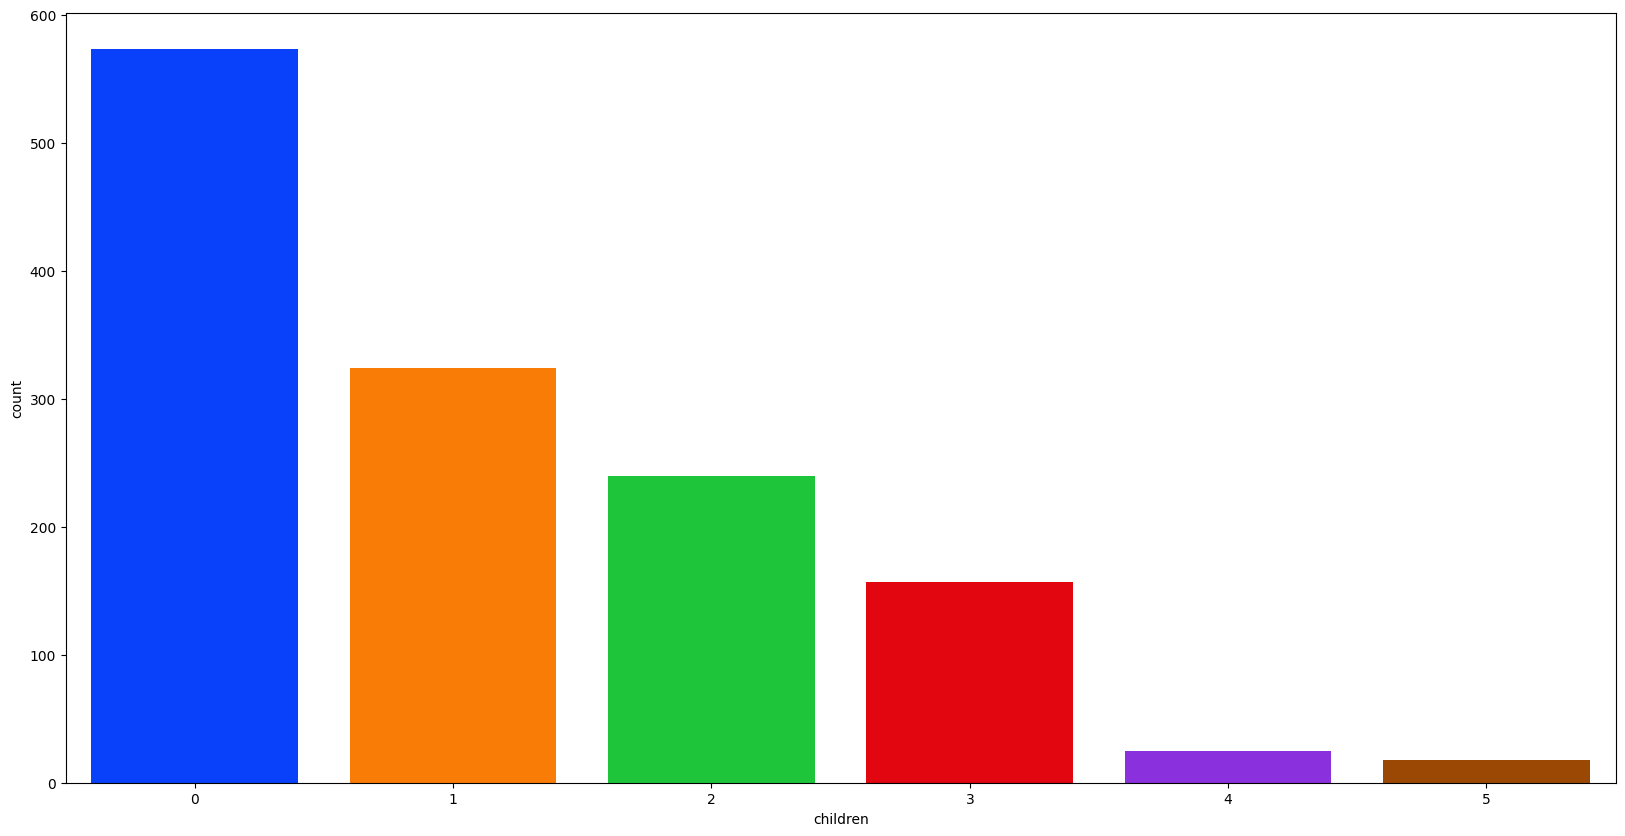

In [ ]:
f,ax=plt.subplots(figsize=(20,10))
sns.countplot(x=df['children'],data=df,palette = 'bright',saturation=0.95)

plt.show()

# **Insights**
# **Higher number of people are with 0 children**

# **BIVARIATE ANALYSIS**

In [ ]:
df.groupby('gender').mean()

,age,bmi,children,expenses
gender,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.946667,30.945778,1.117037,13974.999111


<Axes: xlabel='bmi', ylabel='Density'>

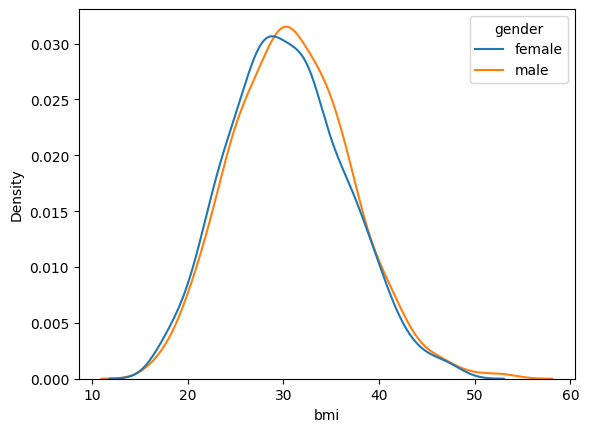

In [ ]:
sns.kdeplot(data=df, x='bmi', hue='gender' )

<Axes: xlabel='smoker', ylabel='count'>

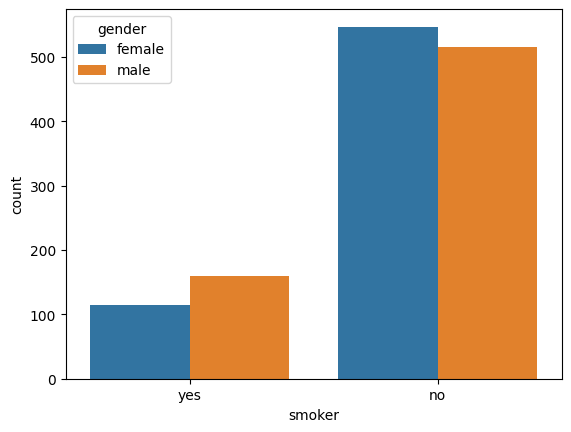

In [ ]:
sns.countplot(data=df, x='smoker', hue='gender')

# **Insights**
# **Males have higher number of smokers compared to females**

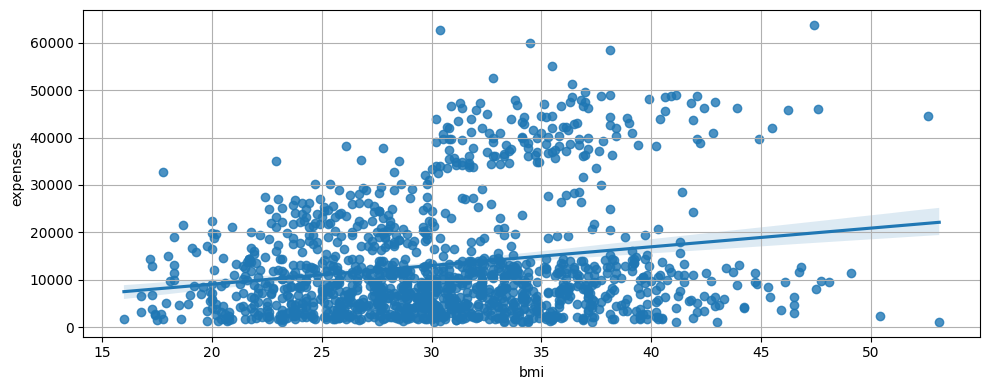

In [ ]:
plt.figure(figsize=(10,4))
sns.regplot(x=df['bmi'],y=df['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()